# Exploración Integral del Rendimiento Académico: Un Análisis Detallado de Variables Clave en un Conjunto de Datos Educativos

**Objetivos del Análisis:**
- Explorar la distribución de clases y streams.
- Evaluar posibles correlaciones entre el rendimiento académico y variables como género, edad y tarifas.
- Visualizar tendencias temporales en el rendimiento académico.
- Identificar patrones relacionados con direcciones de correo electrónico y otros aspectos que podrían estar vinculados al rendimiento académico.

A través de estadísticas descriptivas y visualizaciones, este análisis busca proporcionar una comprensión integral del rendimiento académico en este conjunto de datos. ¡Comencemos explorando los datos y descubriendo las historias que podrían revelar

In [1]:
#Importamos el archivo CSV de estudiantes limpios para realizar el analisis correspondiente
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtiene el directorio actual
directorio_actual = os.getcwd()

# Nombre del archivo CSV que se desea abrir
nombre_archivo = "students_clean.csv"

# Se Construye la ruta completa del archivo utilizando os.path.join
ruta_completa = os.path.join(directorio_actual, nombre_archivo)

# Verifico si el archivo existe antes de intentar abrirlo
if os.path.exists(ruta_completa):
    # Abre el archivo CSV utilizando pandas
    df = pd.read_csv(ruta_completa)

else:
    print(f"El archivo {nombre_archivo} no existe en el directorio actual.")


In [2]:
#Muestro el tipo de objeto,asegurandome que sea un objeto de tipo pandas DataFrame
type(df)

pandas.core.frame.DataFrame

In [3]:
#Muestro las 5 primeras filas del DataFrame
df.head()

,first_name,last_name,class,stream,section,sex,Date_of_birth,email,contact,parent_id,address,fees
0,Layla,Higgins,s1,west,boarding,F,15-Mar-02,LaylaHaggins@gmail.com,2.567072e+11,1.0,Utah,20000.0
1,Sterling,Arias,s3,south,day,M,04-Jul-03,SterlingArias@gmail.com,2.567072e+11,2.0,Washington,20000.0
2,Aleah,Cummings,s6,north,day,F,22-Nov-01,AleahCummings@gmail.com,2.567072e+11,3.0,Virginia,20000.0
3,Brynn,Hopkins,s1,west,day,M,09-Sep-04,BrynnHopkins@gmail.com,2.567072e+11,5.0,Iowa,20000.0
4,Ali,Beil,s2,south,boarding,M,30-Jun-00,AliBeil@gmail.com,2.567072e+11,6.0,North Carolina,20000.0


Este DataFrame muestra información de estudiantes, incluyendo nombres, clases, regiones, secciones, género, fechas de nacimiento, correos electrónicos, contactos, IDs de padres, direcciones y tarifas.

In [4]:
#Muestro las ultimos 5 filas del DataFrame
df.tail()

,first_name,last_name,class,stream,section,sex,Date_of_birth,email,contact,parent_id,address,fees
956,Astrid,Ramos,s1,north,boarding,F,11-May-03,AstridRamos@gmail.com,2.567072e+11,995.0,Oklahoma,20000.0
957,Angel,Anderson,s2,east,day,F,08-Nov-02,AngelAnderson@gmail.com,2.567072e+11,996.0,Tennessee,20000.0
958,Ella,Shields,s4,west,day,M,02-Feb-04,EllaShields@gmail.com,2.567072e+11,997.0,Oregon,20000.0
959,Lyla,Harrell,s6,north,day,M,06-Apr-00,LylaHarrell@gmail.com,2.567072e+11,999.0,Iowa,20000.0
960,Nelson,Schneider,s1,east,boarding,F,24-Jan-05,NelsonSchneider@gmail.com,2.567072e+11,1000.0,Illinois,20000.0


In [5]:
#Muestro las dimensiones del DataFrame (Numeros de filas,Numeros de columnas)
df.shape

(961, 12)

Las dimensiones del DataFrame son 961 filas y 12 columnas.

In [6]:
#Muestro las distintas informacion detallada del DataFrame.incluyendo tipos de datos y cantidad de valores no nulos y la memoria utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     961 non-null    object 
 1   last_name      961 non-null    object 
 2   class          961 non-null    object 
 3   stream         961 non-null    object 
 4   section        961 non-null    object 
 5   sex            961 non-null    object 
 6   Date_of_birth  961 non-null    object 
 7   email          961 non-null    object 
 8   contact        961 non-null    float64
 9   parent_id      961 non-null    float64
 10  address        961 non-null    object 
 11  fees           961 non-null    float64
dtypes: float64(3), object(9)
memory usage: 90.2+ KB


El DataFrame contiene 961 filas y 12 columnas. Los tipos de datos incluyen objetos (cadenas de texto) y números flotantes. No hay valores nulos en ninguna de las columnas, y la memoria utilizada para almacenar el DataFrame es detallada en la información proporcionada.

In [7]:
#Verifico si hay valores nulos
df.count()

first_name       961
last_name        961
class            961
stream           961
section          961
sex              961
Date_of_birth    961
email            961
contact          961
parent_id        961
address          961
fees             961
dtype: int64

La verificación de valores nulos mediante el método count() muestra que no hay valores nulos en ninguna de las columnas del DataFrame. Cada columna tiene 961 valores no nulos.

In [8]:
#Muestro en forma de lista los nombres de las columnas
df.columns

Index(['first_name', 'last_name', 'class', 'stream', 'section', 'sex',
       'Date_of_birth', 'email', 'contact', 'parent_id', 'address', 'fees'],
      dtype='object')

Las columnas del DataFrame incluyen 'first_name', 'last_name', 'class', 'stream', 'section', 'sex', 'Date_of_birth', 'email', 'contact', 'parent_id', 'address' y 'fees'.

In [9]:
## Resumen estadístico de las columnas numéricas
df.describe()

,contact,parent_id,fees
count,9.610000e+02,961.000000,961.000000
mean,2.567072e+11,504.778356,19951.092612
std,2.839295e+02,283.929521,623.081516
min,2.567072e+11,1.000000,10000.000000
25%,2.567072e+11,262.000000,20000.000000
50%,2.567072e+11,509.000000,20000.000000
75%,2.567072e+11,749.000000,20000.000000
max,2.567072e+11,1000.000000,20000.000000


In [10]:
df

,first_name,last_name,class,stream,section,sex,Date_of_birth,email,contact,parent_id,address,fees
0,Layla,Higgins,s1,west,boarding,F,15-Mar-02,LaylaHaggins@gmail.com,2.567072e+11,1.0,Utah,20000.0
1,Sterling,Arias,s3,south,day,M,04-Jul-03,SterlingArias@gmail.com,2.567072e+11,2.0,Washington,20000.0
2,Aleah,Cummings,s6,north,day,F,22-Nov-01,AleahCummings@gmail.com,2.567072e+11,3.0,Virginia,20000.0
3,Brynn,Hopkins,s1,west,day,M,09-Sep-04,BrynnHopkins@gmail.com,2.567072e+11,5.0,Iowa,20000.0
4,Ali,Beil,s2,south,boarding,M,30-Jun-00,AliBeil@gmail.com,2.567072e+11,6.0,North Carolina,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
956,Astrid,Ramos,s1,north,boarding,F,11-May-03,AstridRamos@gmail.com,2.567072e+11,995.0,Oklahoma,20000.0
957,Angel,Anderson,s2,east,day,F,08-Nov-02,AngelAnderson@gmail.com,2.567072e+11,996.0,Tennessee,20000.0
958,Ella,Shields,s4,west,day,M,02-Feb-04,EllaShields@gmail.com,2.567072e+11,997.0,Oregon,20000.0
959,Lyla,Harrell,s6,north,day,M,06-Apr-00,LylaHarrell@gmail.com,2.567072e+11,999.0,Iowa,20000.0


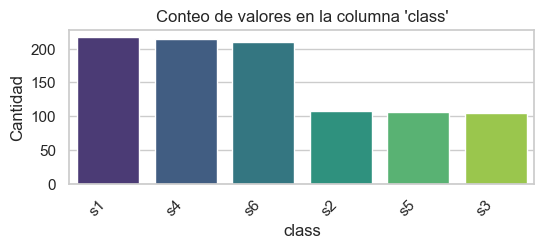

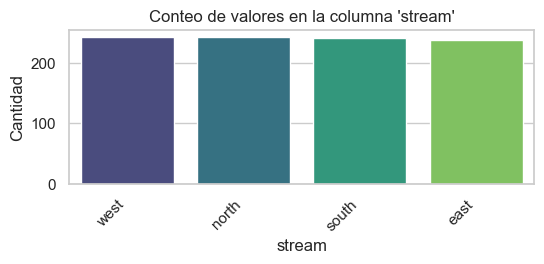

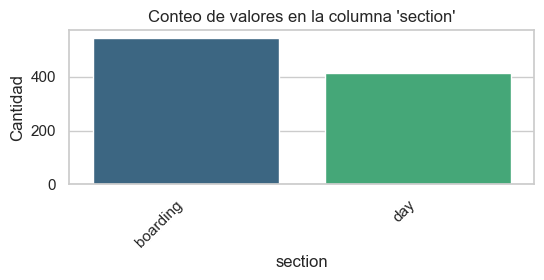

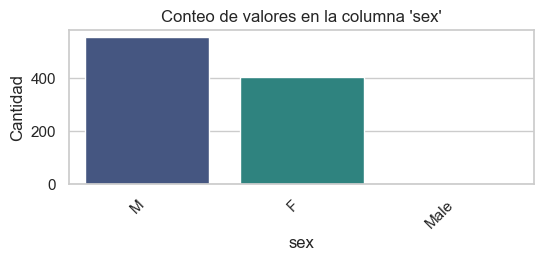

In [11]:
#Creo un grafico de barras para distintas columnas en particular por si hay mismo valores que se pueda remplazar por uno solo
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Lista de columnas a analizar
columnas_a_analizar = ['class', 'stream', 'section', 'sex']

# Iterar sobre las columnas y generar gráficos de barras con Seaborn
for column in columnas_a_analizar:
    conteo_valores = df[column].value_counts()
    
    # Crear el gráfico de barras con Seaborn
    plt.figure(figsize=(6, 2))
    barplot = sns.barplot(x=conteo_valores.index, y=conteo_valores, palette="viridis")
    
    # Configurar el título y las etiquetas
    plt.title(f"Conteo de valores en la columna '{column}'")
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    
    # Rotar las etiquetas del eje x para mayor legibilidad
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')
    
    # Mostrar el gráfico
    plt.show()


En este caso encuentro que Male es lo mismo que decir M por lo cual procederemos a cambiarlo

In [12]:
# Reemplazar 'Male' con 'M' en la columna 'sex' y actualizar el DataFrame
df['sex'] = df['sex'].replace('Male', 'M')


In [13]:
# Contar los valores únicos en la columna 'sex' después del reemplazo
df['sex'].value_counts()

M    557
F    404
Name: sex, dtype: int64

In [14]:
# Iterar sobre cada columna y mostrar la cuenta de valores únicos
for column in df.columns:
    conteo_valores = df[column].value_counts()
    print(f"\nConteo de valores en la columna '{column}':\n{conteo_valores}")



Conteo de valores en la columna 'first_name':
Titan       4
Mikayla     4
Leighton    4
Emma        4
Reign       4
           ..
Eugene      1
Violet      1
Laura       1
Willie      1
Lyla        1
Name: first_name, Length: 739, dtype: int64

Conteo de valores en la columna 'last_name':
Hurst      5
Salinas    5
Phan       5
Lowe       5
Bell       4
          ..
Moore      1
Beck       1
Tyler      1
Correa     1
Shields    1
Name: last_name, Length: 617, dtype: int64

Conteo de valores en la columna 'class':
s1    217
s4    214
s6    210
s2    108
s5    107
s3    105
Name: class, dtype: int64

Conteo de valores en la columna 'stream':
west     242
north    242
south    240
east     237
Name: stream, dtype: int64

Conteo de valores en la columna 'section':
boarding    546
day         415
Name: section, dtype: int64

Conteo de valores en la columna 'sex':
M    557
F    404
Name: sex, dtype: int64

Conteo de valores en la columna 'Date_of_birth':
02-Jan-04    11
24-Apr-03     9
11-Au

In [15]:
# Verificar duplicados en todas las columnas excepto 'first_name'
duplicados_excepto_first_name = df[df.columns.difference(['first_name'])].duplicated()

# Mostrar las filas que contienen duplicados
filas_con_duplicados_excepto_first_name = df[duplicados_excepto_first_name]
print(filas_con_duplicados_excepto_first_name)


Empty DataFrame
Columns: [first_name, last_name, class, stream, section, sex, Date_of_birth, email, contact, parent_id, address, fees]
Index: []


In [16]:
#Distribución de estudiantes por género en cada clase y stream
df.groupby(['class', 'stream', 'sex']).size().unstack()

sex            F   M
class stream        
s1    east    18  36
      north   24  30
      south   25  30
      west    21  33
s2    east    11  17
      north   11  16
      south   11  16
      west    14  12
s3    east    11  13
      north   10  18
      south   11  16
      west    12  14
s4    east    25  27
      north   23  31
      south   21  32
      west    22  33
s5    east    12  15
      north   11  15
      south    9  17
      west    12  16
s6    east    25  27
      north   23  30
      south   21  31
      west    21  32

La tabla muestra la distribución de estudiantes por género en cada clase y flujo, indicando la cantidad de estudiantes femeninas ('F') y masculinos ('M') en cada combinación específica de clase y flujo. Los valores reflejan la diversidad de género en distintos contextos académicos. En este contexto, "flujo" representa las diferentes direcciones o enfoques de estudio disponibles dentro de cada clase.

In [17]:
#Diferencia en rendimiento académico entre géneros
df.groupby('sex')['fees'].mean()

sex
F    19985.148515
M    19926.391382
Name: fees, dtype: float64

El código df.groupby('sex')['fees'].mean() calcula el gasto promedio entre los géneros femenino ('F') y masculino ('M') en función de la columna 'fees'. La salida refleja una ligera diferencia en el gasto promedio, siendo ligeramente mayor para estudiantes femeninas en comparación con estudiantes masculinos.

In [18]:
df

,first_name,last_name,class,stream,section,sex,Date_of_birth,email,contact,parent_id,address,fees
0,Layla,Higgins,s1,west,boarding,F,15-Mar-02,LaylaHaggins@gmail.com,2.567072e+11,1.0,Utah,20000.0
1,Sterling,Arias,s3,south,day,M,04-Jul-03,SterlingArias@gmail.com,2.567072e+11,2.0,Washington,20000.0
2,Aleah,Cummings,s6,north,day,F,22-Nov-01,AleahCummings@gmail.com,2.567072e+11,3.0,Virginia,20000.0
3,Brynn,Hopkins,s1,west,day,M,09-Sep-04,BrynnHopkins@gmail.com,2.567072e+11,5.0,Iowa,20000.0
4,Ali,Beil,s2,south,boarding,M,30-Jun-00,AliBeil@gmail.com,2.567072e+11,6.0,North Carolina,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
956,Astrid,Ramos,s1,north,boarding,F,11-May-03,AstridRamos@gmail.com,2.567072e+11,995.0,Oklahoma,20000.0
957,Angel,Anderson,s2,east,day,F,08-Nov-02,AngelAnderson@gmail.com,2.567072e+11,996.0,Tennessee,20000.0
958,Ella,Shields,s4,west,day,M,02-Feb-04,EllaShields@gmail.com,2.567072e+11,997.0,Oregon,20000.0
959,Lyla,Harrell,s6,north,day,M,06-Apr-00,LylaHarrell@gmail.com,2.567072e+11,999.0,Iowa,20000.0


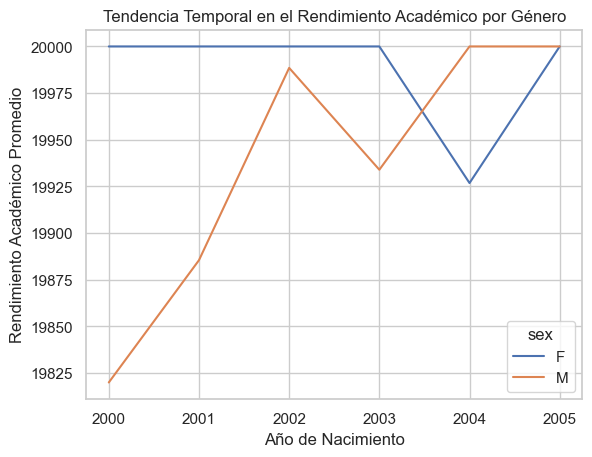

In [19]:
#Tendencia temporal en el rendimiento académico de hombres y mujeres
df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'])
df['Year_of_birth'] = df['Date_of_birth'].dt.year
gender_trend = df.groupby(['Year_of_birth', 'sex'])['fees'].mean().unstack()
gender_trend.plot()
plt.title('Tendencia Temporal en el Rendimiento Académico por Género')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Rendimiento Académico Promedio')
plt.show()

Se genera un gráfico de líneas que ilustra la tendencia temporal en las tarifas promedio de rendimiento académico para hombres y mujeres, categorizadas por su año de nacimiento. La visualización proporciona insights sobre posibles variaciones o patrones en el rendimiento académico a lo largo del tiempo en ambos géneros

In [20]:
df

,first_name,last_name,class,stream,section,sex,Date_of_birth,email,contact,parent_id,address,fees,Year_of_birth
0,Layla,Higgins,s1,west,boarding,F,2002-03-15,LaylaHaggins@gmail.com,2.567072e+11,1.0,Utah,20000.0,2002
1,Sterling,Arias,s3,south,day,M,2003-07-04,SterlingArias@gmail.com,2.567072e+11,2.0,Washington,20000.0,2003
2,Aleah,Cummings,s6,north,day,F,2001-11-22,AleahCummings@gmail.com,2.567072e+11,3.0,Virginia,20000.0,2001
3,Brynn,Hopkins,s1,west,day,M,2004-09-09,BrynnHopkins@gmail.com,2.567072e+11,5.0,Iowa,20000.0,2004
4,Ali,Beil,s2,south,boarding,M,2000-06-30,AliBeil@gmail.com,2.567072e+11,6.0,North Carolina,20000.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,Astrid,Ramos,s1,north,boarding,F,2003-05-11,AstridRamos@gmail.com,2.567072e+11,995.0,Oklahoma,20000.0,2003
957,Angel,Anderson,s2,east,day,F,2002-11-08,AngelAnderson@gmail.com,2.567072e+11,996.0,Tennessee,20000.0,2002
958,Ella,Shields,s4,west,day,M,2004-02-02,EllaShields@gmail.com,2.567072e+11,997.0,Oregon,20000.0,2004
959,Lyla,Harrell,s6,north,day,M,2000-04-06,LylaHarrell@gmail.com,2.567072e+11,999.0,Iowa,20000.0,2000


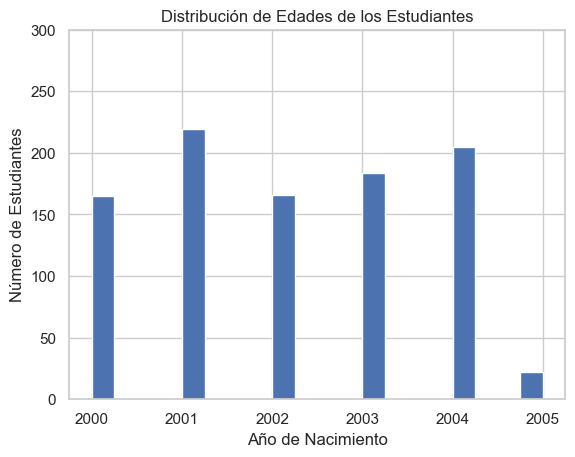

In [21]:
#Exploración de Edades
#Distribución de edades de los estudiantes
df['Year_of_birth'] = df['Date_of_birth'].dt.year
age_distribution = df['Year_of_birth'].plot(kind='hist', bins=20)
plt.title('Distribución de Edades de los Estudiantes')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Número de Estudiantes')
plt.ylim(0, 300)
plt.show()

El histograma ilustra la distribución de las edades de los estudiantes según sus años de nacimiento, proporcionando una representación visual de la frecuencia de estudiantes en diferentes rangos de edad en el conjunto de datos.

In [22]:
#Relación entre edad de los estudiantes y el stream al que pertenecen
df.groupby('stream')['Year_of_birth'].mean()


stream
east     2002.088608
north    2002.165289
south    2002.120833
west     2002.086777
Name: Year_of_birth, dtype: float64

Este análisis revela la relación entre la edad promedio de los estudiantes y los distintos flujos académicos ('east', 'north', 'south', 'west'). Los resultados sugieren que la edad promedio varía ligeramente entre los flujos, siendo más prominente en el flujo 'north'.

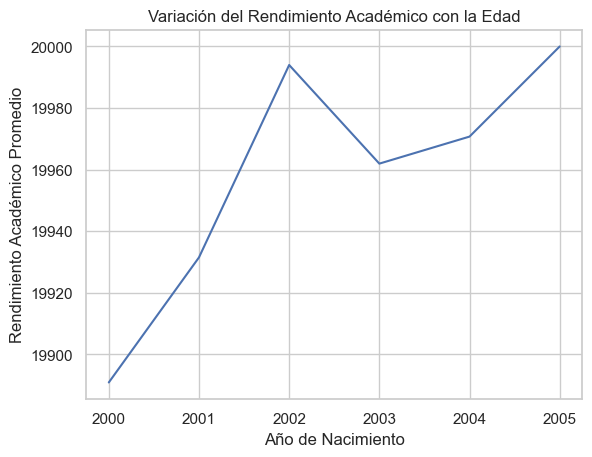

In [23]:
#Variación del rendimiento académico según diferentes edades
age_performance_variation = df.groupby('Year_of_birth')['fees'].mean()
age_performance_variation.plot()
plt.title('Variación del Rendimiento Académico con la Edad')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Rendimiento Académico Promedio')
plt.show()

Este gráfico ilustra la variación del rendimiento académico promedio en relación con la edad de los estudiantes, proporcionando una perspectiva visual sobre cómo evoluciona el rendimiento académico en función del año de nacimiento en el conjunto de datos.

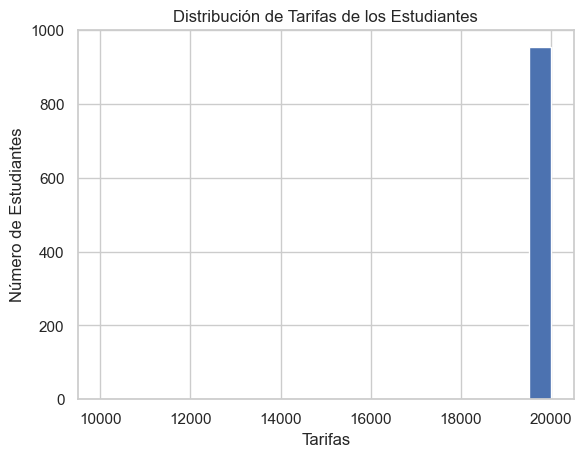

In [24]:
#Distribución de tarifas en el conjunto de datos
fees_distribution = df['fees'].plot(kind='hist', bins=20)
plt.title('Distribución de Tarifas de los Estudiantes')
plt.xlabel('Tarifas')
plt.ylabel('Número de Estudiantes')
plt.show()

Este histograma presenta la distribución de las tarifas abonadas por los estudiantes, brindando una visión visual de la frecuencia de diferentes niveles de tarifas en el conjunto de datos.

In [25]:
#Diferencias significativas en tarifas entre clases y streams
fees_class_stream = df.groupby(['class', 'stream'])['fees'].mean().unstack()
print("Diferencias en tarifas entre clases y streams:\n", fees_class_stream)

Diferencias en tarifas entre clases y streams:
 stream          east         north         south          west
class                                                         
s1      20000.000000  19814.814815  20000.000000  19907.407407
s2      19785.714286  20000.000000  20000.000000  20000.000000
s3      20000.000000  20000.000000  20000.000000  20000.000000
s4      20000.000000  20000.000000  20000.000000  19981.818182
s5      20000.000000  19730.769231  20000.000000  20000.000000
s6      20000.000000  20000.000000  19653.846154  20000.000000


El análisis de tarifas promedio revela diferencias significativas entre clases y flujos, proporcionando una visión detallada de la variabilidad en los costos asociados con diversas combinaciones de clases y flujos de estudiantes en el conjunto de datos.

In [26]:
#Verifico la columna 'contact'
df['contact']

0      2.567072e+11
1      2.567072e+11
2      2.567072e+11
3      2.567072e+11
4      2.567072e+11
           ...     
956    2.567072e+11
957    2.567072e+11
958    2.567072e+11
959    2.567072e+11
960    2.567072e+11
Name: contact, Length: 961, dtype: float64

In [31]:
#Uso numero aleatorios para modificar los numeros de la columna'contact'
import random
# Defino una función para generar números de contacto aleatorios
def generar_contacto_aleatorio():
    return random.randint(1000000000, 9999999999)
# Cambiar la columna 'contact' con nuevos números aleatorios
df['contact'] = df['contact'].apply(lambda x: generar_contacto_aleatorio())

In [32]:
#Verifico si hubo cambios
df['contact']

0      4261641687
1      1560267842
2      7683211467
3      3667536431
4      3245802237
          ...    
956    2824621663
957    6984478252
958    4994440973
959    6400421000
960    9573361644
Name: contact, Length: 961, dtype: int64

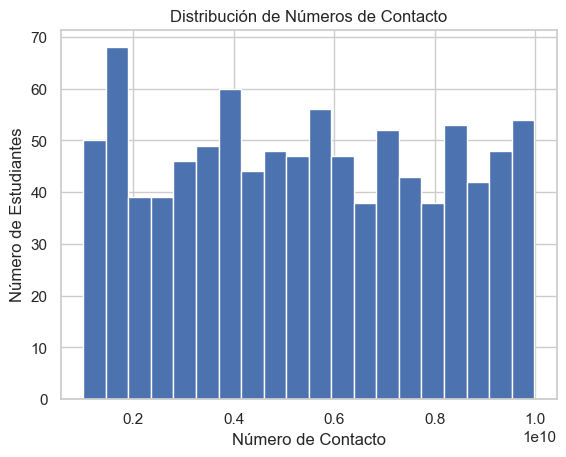

In [39]:
#Distribución de números de contacto 
contact_distribution = df['contact'].plot(kind='hist', bins=20)
plt.title('Distribución de Números de Contacto')
plt.xlabel('Número de Contacto')
plt.ylabel('Número de Estudiantes')
plt.show()

El histograma ilustra la distribución de números de contacto entre los estudiantes, revelando la frecuencia con la que aparecen diferentes rangos de números en la columna 'contact' de nuestro conjunto de datos.

In [42]:
#Diferencias en rendimiento académico entre estudiantes internos y diarios
df.groupby('section')['fees'].mean()

section
boarding    19941.391941
day         19963.855422
Name: fees, dtype: float64

In [46]:
#Diferencias en género, edad o tarifas entre estos dos grupos
intern_vs_daily_gender_age_fees = df.groupby('section')[['sex', 'Year_of_birth', 'fees']].mean()
print("Diferencias en género, edad o tarifas entre estudiantes internos y diarios:\n", intern_vs_daily_gender_age_fees)

Diferencias en género, edad o tarifas entre estudiantes internos y diarios:
           Year_of_birth          fees
section                              
boarding    2002.219780  19941.391941
day         2001.978313  19963.855422


Comparación de género, edad y tarifas entre estudiantes internos y diarios revela sutiles diferencias, con estudiantes internos nacidos en promedio en 2002 y tarifas alrededor de $19,941.


Mientras que los estudiantes diarios tienen un año de nacimiento promedio de 2001 y tarifas cercanas a $19,964.

In [48]:
#Importo mi Csv
df.to_csv('Students_clean_mejorado.csv',index=False)